<a href="https://colab.research.google.com/github/jiali25/Design-of-a-system-for-the-analysis-of-reverberant-acoustic-environments-using-Deep-Learning/blob/master/2nd_part_of_the_analysis_of_reverberation_with_different_representations_time_freq_for_Vowels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Acceso a Google Drive**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
ls '/content/drive/My Drive/'

'Colab Notebooks'/   Documentos/   foo.txt   REVER/   REVERBERADOS/   TIMIT/


In [0]:
cd '/content/drive/My Drive/TIMIT'

/content/drive/My Drive/TIMIT


In [0]:
ls

TIMIT-20200324T163854Z-001.zip  Train_IR1/


In [0]:
!cp TIMIT-20200324T163854Z-001.zip /content/

In [0]:
cd /content/

/content


In [0]:
ls

air_binaural_lecture_1_1_6.mat  sample_data/
drive/                          TIMIT/
fricativa_reverb_lecture_m.wav  TIMIT-20200324T163854Z-001.zip


In [0]:
! unzip TIMIT-20200324T163854Z-001.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: TIMIT/train/dr3/feme0/si2135.wav  
  inflating: TIMIT/train/dr5/fgdp0/sa2.wrd  
  inflating: TIMIT/test/dr2/mrcz0/sx101.wrd  
  inflating: TIMIT/train/dr2/fcmm0/sx273.wav  
  inflating: TIMIT/train/dr1/mdpk0/sx333.wav  
  inflating: TIMIT/train/dr3/mcef0/sa2.phn  
  inflating: TIMIT/test/dr5/msfh1/sa1.wav  
  inflating: TIMIT/test/dr7/mrcs0/sx323.wav  
  inflating: TIMIT/train/dr3/mjjb0/si1277.wrd  
  inflating: TIMIT/train/dr3/mdns0/sx381.wrd  
  inflating: TIMIT/train/dr3/feme0/sa1.wrd  
  inflating: TIMIT/train/dr2/fcmm0/sa1.txt  
  inflating: TIMIT/train/dr7/fpac0/sx121.wrd  
  inflating: TIMIT/train/dr7/fpac0/si661.phn  
  inflating: TIMIT/train/dr2/mkdt0/sa1.wrd  
  inflating: TIMIT/train/dr3/mcef0/si1765.phn  
  inflating: TIMIT/train/dr2/fcmm0/sx273.phn  
  inflating: TIMIT/train/dr7/fpac0/sx31.wav  
  inflating: TIMIT/train/dr7/fpac0/sx301.wrd  
  inflating: TIMIT/test/dr5/msfh1/sa2.phn  
  inflating: TI

In [0]:
# Importar biblioteca Librosa
import librosa
print(librosa.__version__)

0.6.3


In [0]:
# Elegir voz de hombre o de mujer
ls ./TIMIT/train/dr1/mdpk0/

sa1.phn  sa2.wav     si1683.phn  si552.wav  sx243.phn  sx333.wav  sx63.phn
sa1.txt  sa2.wrd     si1683.txt  si552.wrd  sx243.txt  sx333.wrd  sx63.txt
sa1.wav  si1053.phn  si1683.wav  sx153.phn  sx243.wav  sx423.phn  sx63.wav
sa1.wrd  si1053.txt  si1683.wrd  sx153.txt  sx243.wrd  sx423.txt  sx63.wrd
sa2.phn  si1053.wav  si552.phn   sx153.wav  sx333.phn  sx423.wav
sa2.txt  si1053.wrd  si552.txt   sx153.wrd  sx333.txt  sx423.wrd


In [0]:
# Cargar el archivo y mostrar el número de muestras, la frecuencia de muestreo y la duración en segundos
filename='./TIMIT/train/dr1/mdpk0/sx333.wav'
y_or, sr = librosa.load(filename, sr=16000)
print(len(y_or), sr, ' Duracion en segundos: ', len(y_or)/sr)

55706 16000  Duracion en segundos:  3.481625


In [0]:
# Ver cuántas muestras hay en ese fonema
len(y_or[48773:51440])

2667

In [0]:
filename='./TIMIT/train/dr1/mdpk0/sx333.wav'
# Para estudio de una vocal, se aisla esa vocal del resto de la señal
# offset=(nºmuestra inicio/sr); duration=(nºmuestra final/sr)-offset
y_or, sr = librosa.load(filename, offset=3.19831, duration=0.069, sr=16000)
print(len(y_or), sr, ' Duracion en segundos: ', len(y_or)/sr)

1104 16000  Duracion en segundos:  0.069


In [0]:
# Audio widget para reproducir la vozfrom IPython.display import Audio
from IPython.display import Audio
Audio(data=y_or, rate=sr)

In [0]:
# Transcripción de la frase 
! cat ./TIMIT/train/dr1/fmem0/sx333.txt

0 82228 An adult male baboon's teeth are not suitable for eating shellfish.


In [0]:
# Transcripción de fonemas con el límite en muestras
! cat ./TIMIT/train/dr1/fmem0/sx333.phn

0 3520 h#
3520 3940 q
3940 5045 ae
5045 6051 n
6051 7586 q
7586 9399 ae
9399 10001 dx
10001 10945 ah
10945 12323 l
12323 13840 tcl
13840 15009 pau
15009 16106 m
16106 18422 ey
18422 20219 l
20219 21919 pau
21919 22181 b
22181 24271 ae
24271 25817 bcl
25817 26100 b
26100 28532 uw
28532 29890 n
29890 31910 z
31910 32917 tcl
32917 34798 t
34798 37000 iy
37000 39560 th
39560 40427 pau
40427 41166 q
41166 41608 ax
41608 42527 r
42527 44620 n
44620 46876 aa
46876 47760 tcl
47760 48773 pau
48773 51440 s
51440 52880 ux
52880 53440 dx
53440 54160 ax
54160 54976 bcl
54976 55530 b
55530 57046 el
57046 59133 f
59133 60248 er
60248 62240 q
62240 63210 iy
63210 63917 dx
63917 64878 iy
64878 66236 ng
66236 69431 sh
69431 70856 eh
70856 72176 l
72176 74783 f
74783 76402 ih
76402 79744 sh
79744 82160 h#


In [0]:
# Importar bibliotecas
import os
import sys
import shutil
import re
import librosa
import numpy as np
from scipy.io.wavfile import write
from scipy.io import loadmat
from scipy import signal
from IPython.display import Audio
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
ls /content/drive/'My Drive'/REVER

air_binaural_aula_carolina_1_1_3_180_3.mat  air_binaural_meeting_1_1_3.mat
air_binaural_lecture_1_1_6.mat              air_binaural_stairway_1_1_3_75.mat


In [0]:
# Copiar la RIR que se quiera procesar con el audio
!cp /content/drive/'My Drive'/REVER/air_binaural_meeting_1_1_3.mat  .

In [0]:
# Cargar la RIR
IR_file = 'air_binaural_meeting_1_1_3.mat'
IR_data = loadmat(IR_file, squeeze_me=True, struct_as_record=False)
IR = IR_data['h_air']
air_info = IR_data['air_info']

In [0]:
air_info.filename

'air_meeting_1_1_3.mat'

In [0]:
air_info.room

'meeting'

In [0]:
fs_ori = air_info.fs

In [0]:
IR = librosa.resample(IR, fs_ori, 16000)

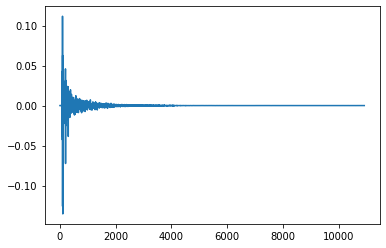

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(IR)

In [0]:
# Reverberación
# Normalización de la RIR
IR=IR/np.abs(np.max(IR))
p_max=np.argmax(np.abs(IR))
 
audio_aug = signal.fftconvolve(y_or, IR, mode='full')

# TRIM audio para suprimir el silencio final del audio
audio_aug, index = librosa.effects.trim(audio_aug, top_db=40)
            
y = np.int16(audio_aug/np.max(np.abs(audio_aug)) 
                                 * 32767* (np.random.rand(1)*3+7)/10)

In [0]:
# Descargar este audio y subirlo a la carpeta "REVERBERADOS"
# Reproducir el audio
Audio(data=y, rate=sr)

In [0]:
ls '/content/drive/My Drive/'

'Colab Notebooks'/   Documentos/   foo.txt   REVER/   REVERBERADOS/   TIMIT/


In [0]:
cd '/content/drive/My Drive/REVERBERADOS'

/content/drive/My Drive/REVERBERADOS


In [0]:
ls

fmem0_sx333_lecture.wav         mdpk0_sx333_lecture.wav
fmem0_sx333_meeting.wav         mdpk0_sx333_meeting.wav
fricativa_reverb_lecture_f.wav  vocal_reverb_lecture_f.wav
fricativa_reverb_lecture_m.wav  vocal_reverb_lecture_m.wav


In [0]:
!cp fricativa_reverb_lecture_m.wav /content/

In [0]:
filename='./fricativa_reverb_lecture_m.wav'
y, sr = librosa.load(filename, duration=0.069, sr=16000)
Audio(data=y, rate=sr)


# Imprimir la señal original y la filtrada

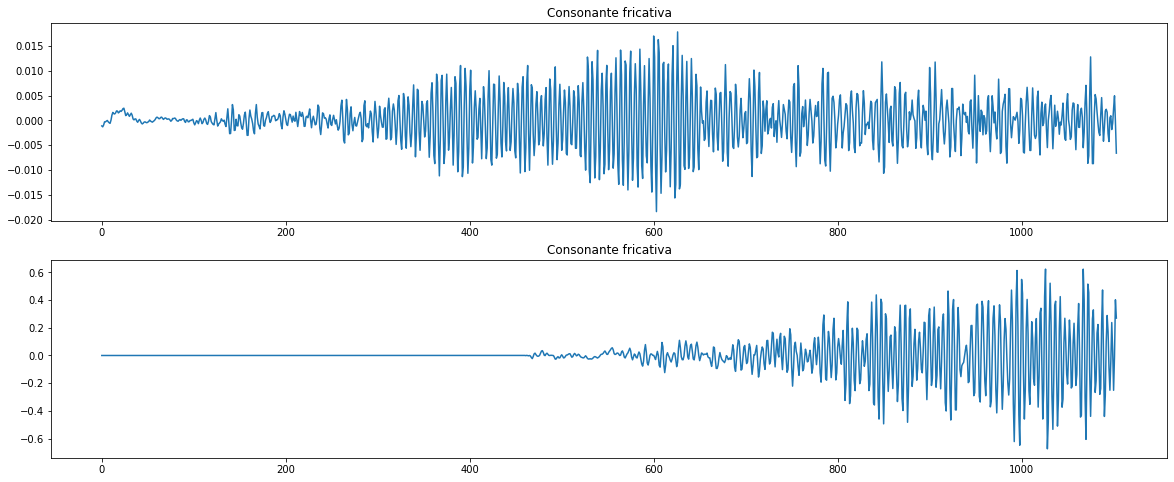

In [0]:
plt.figure(figsize=(20,8))
plt.subplot(211)
plt.title('Consonante fricativa')
plt.plot(y_or)
plt.subplot(212)
plt.title('Consonante fricativa')
plt.plot(y)

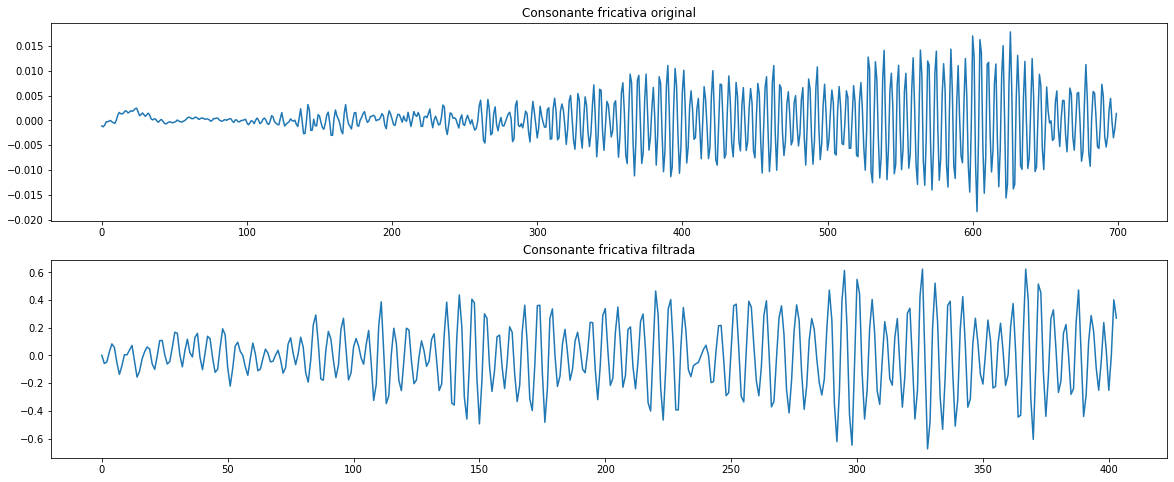

In [0]:
# Para compararlas es mejor ajustar las muestras
plt.figure(figsize=(20,8))
plt.subplot(211)
plt.title('Consonante fricativa original')
plt.plot(y_or[0:700])
plt.subplot(212)
plt.title('Consonante fricativa filtrada')
plt.plot(y[700:])

# **STFT**

/usr/local/lib/python3.6/dist-packages/librosa/core/spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


Text(0.5, 1.0, 'Espectrograma consonante fricativa con reverberación')

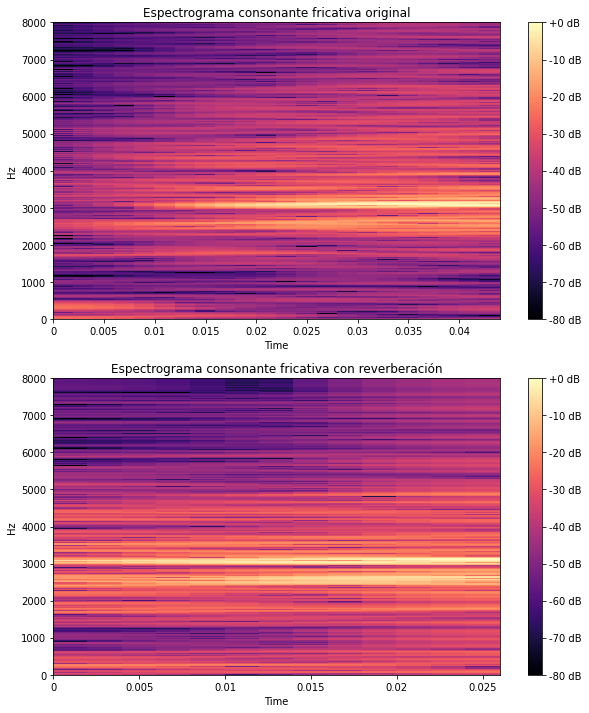

In [0]:
# En estas gráficas igual, hacer ajuste de muestras
import librosa.display

plt.figure(figsize=(10,12))

plt.subplot(211)
D_or = librosa.amplitude_to_db(librosa.stft(y_or[0:700],
                            n_fft=2048, hop_length=32, win_length=512, window='hann'),
                            ref=np.max)

librosa.display.specshow(D_or, y_axis='linear', x_axis='time',hop_length=32, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma consonante fricativa original')

plt.subplot(212)

D = librosa.amplitude_to_db(librosa.stft(y[700:],
                            n_fft=2048, hop_length=32, win_length=512, window='hann'),
                            ref=np.max)

librosa.display.specshow(D, y_axis='linear', x_axis='time',hop_length=32, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma consonante fricativa con reverberación')

# **Espectrograma Mel**

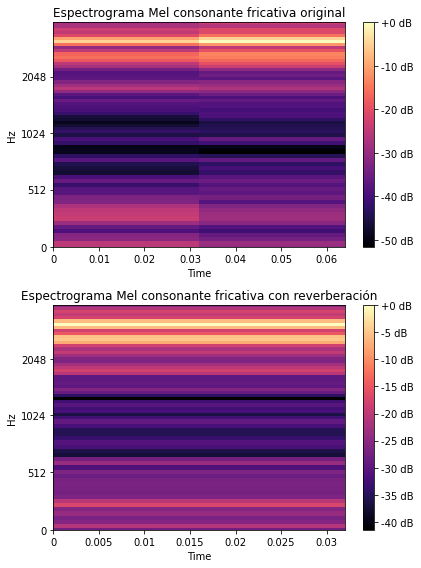

In [0]:
# Melspectrogram es aplicar el banco de filtros (triangulares) separados según la escala Mel, que es una escala logarítmica (por eso se hace como zoom de las bajas frecuencias)
# https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0

MelS = librosa.feature.melspectrogram(y_or[0:700], sr=sr, n_fft=2048, \
                                      fmin=20, fmax=4000, n_mels=64)

MelS_REV = librosa.feature.melspectrogram(y[700:], sr=sr, n_fft=2048, \
                                      fmin=20, fmax=4000, n_mels=64) 

plt.figure(figsize=(6, 8))
plt.subplot(211)
librosa.display.specshow(librosa.power_to_db(MelS, ref=np.max), y_axis='mel', fmax=4000, x_axis='time', hop_length=512, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma Mel consonante fricativa original')
plt.tight_layout()

plt.subplot(212)
librosa.display.specshow(librosa.power_to_db(MelS_REV, ref=np.max), y_axis='mel', fmax=4000, x_axis='time', hop_length=512, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma Mel consonante fricativa con reverberación')
plt.tight_layout()


In [0]:
MelS.shape

(64, 2)

# **Sala: H(w) obtenida con la fft**

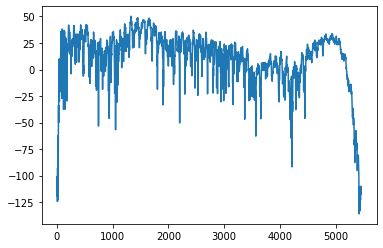

In [0]:
# H(w) con DFT de toda la IR
from scipy.fft import fft
DFT_IR = 20*np.log(np.abs(fft(IR)))
plt.plot(DFT_IR[0:len(DFT_IR)//2])

In [0]:
S_OR[:,0].shape

(1025,)

In [0]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [0]:
(sr//2)//S_OR.shape[0]

7

In [0]:
yfreq = np.linspace(0.0, sr//2, S_OR.shape[0])

In [0]:
yfreq

array([0.0000000e+00, 7.8125000e+00, 1.5625000e+01, ..., 7.9843750e+03,
       7.9921875e+03, 8.0000000e+03])

In [0]:
yfreq.shape

(1025,)

# **STFT**

Text(0.5, 0, 'Hz')

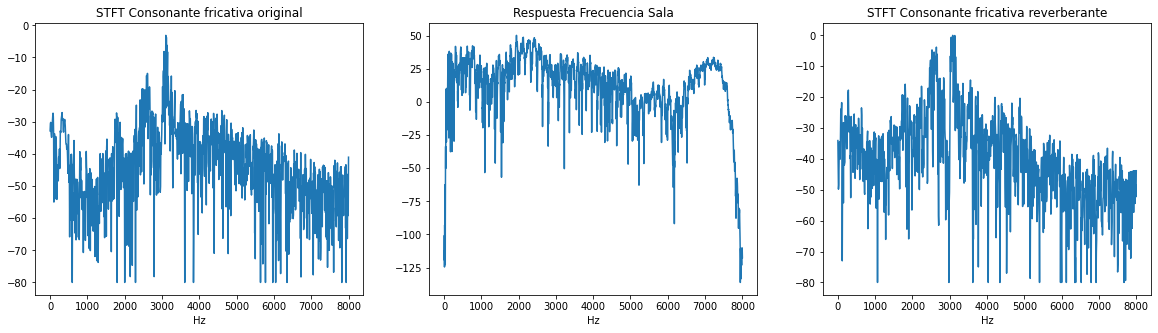

In [0]:
S_OR = librosa.amplitude_to_db(np.abs(librosa.stft(y_or[0:700], n_fft=2048)), ref=np.max)
S_REV = librosa.amplitude_to_db(np.abs(librosa.stft(y[700:], n_fft=2048)), ref=np.max)

plt.figure(figsize=(20,5))
plt.subplot(131)
# Para dibujar el eje de frecuencia
yfreq = np.linspace(0.0, sr//2, S_OR.shape[0])
plt.title("STFT Consonante fricativa original")
plt.plot(yfreq,S_OR[:,0])
plt.xlabel('Hz')

plt.subplot(132)
plt.title("Respuesta Frecuencia Sala")

# Aquí el número de puntos e la DFT es diferente
yfreq2 = np.linspace(0.0, sr//2, len(DFT_IR)//2)
plt.plot(yfreq2, DFT_IR[0:len(DFT_IR)//2])
plt.xlabel('Hz')
plt.subplot(133)
plt.title("STFT Consonante fricativa reverberante")
plt.plot(yfreq,S_REV[:,0])
plt.xlabel('Hz')

In [0]:
sr

16000

# **Sala: H(w) considerando que la h[n] es la respuesta al impulso de un filtro FIR**

Text(0.5, 0, 'Hz')

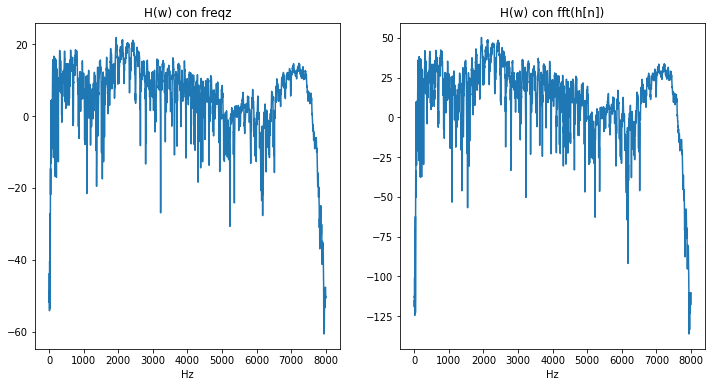

In [0]:
# Hacer un plot de la H(w) considerando que la h[n] es la respuesta al impulso de un filtro FIR, que es un filtro con los coeficientes del numerador = h[n] y con un 1 en el numerado
import numpy as np
import matplotlib.pyplot as plot
from scipy.signal import freqz
import math

# Para comparar con la H(w) obtenida con la fft

from scipy.fft import fft
DFT_IR = 20*np.log(np.abs(fft(IR)))
h = IR
[F,H] = freqz(h,1,len(DFT_IR)//2)
H_db = 20 * np.log10(np.abs(H))
yfreq2 = np.linspace(0.0, sr//2, len(DFT_IR)//2)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(yfreq2,H_db)
plt.title('H(w) con freqz')
plt.xlabel('Hz')
plt.subplot(122)
plt.plot(yfreq2,DFT_IR[0:len(DFT_IR)//2])
plt.title('H(w) con fft(h[n])')
plt.xlabel('Hz')

Text(0.5, 0, 'Hz')

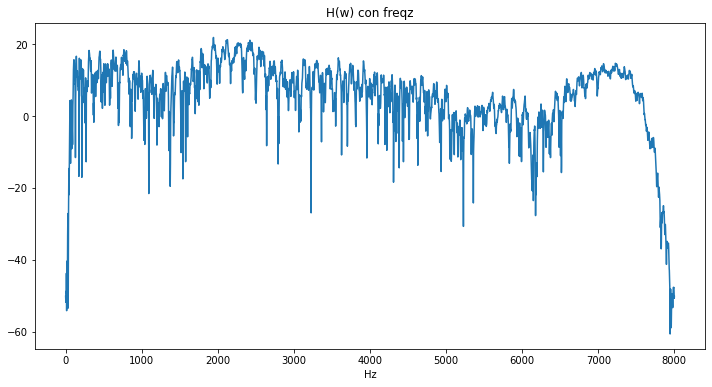

In [0]:
plt.figure(figsize=(12,6))
plt.plot(yfreq2,H_db)
plt.title('H(w) con freqz')
plt.xlabel('Hz')